<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M1_Recap_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fishy Dimensions: A Hands-On Project on Dimensionality Reduction

## How big is the fish?

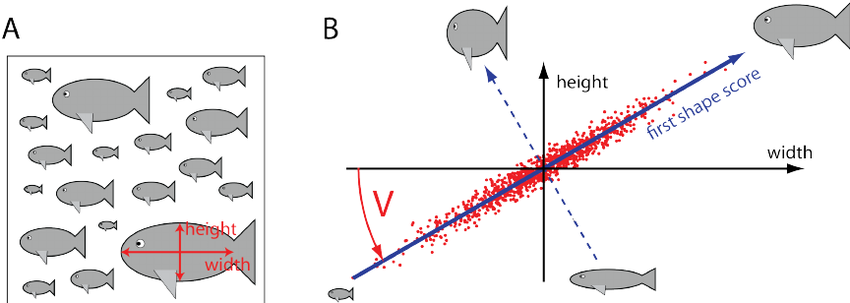

### Fish dataset description

    Species: Species name of fish
    Weight: Weight of fish in gram
    Length1: Vertical length in cm
    Length2: Diagonal length in cm
    Length3: Cross length in cm
    Height: Height in cm
    Width: Diagonal width in cm

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import plotly.express as px

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Fish.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Fish 3d plot

In [ ]:
fig = px.scatter_3d(df,
                    x='Length2',
                    y='Width',
                    z='Height',
                    color='Species')
fig.show()

### Plan of exercise

1. Check covariance Matrix
2. Calcualte Eigenvectors and Eigenvalues
3. Select M (< Ds) Eigenvectors with highest Eigenvalues
4. Project data points to these Eigenvectors
  * Calculate center of the points: X-X.mean()
  * Calculate Dot product of X_centered by eigenvectors



Use plotly package for plotting

```fig = px.scatter(x=x, y=y, color=labels)```

```fig.show()```

### Two principal components

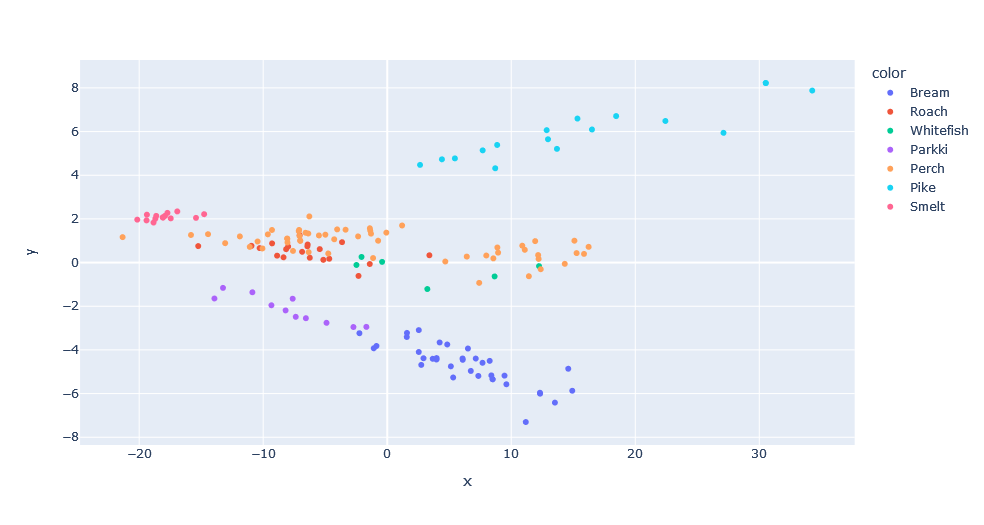

### One Principal component

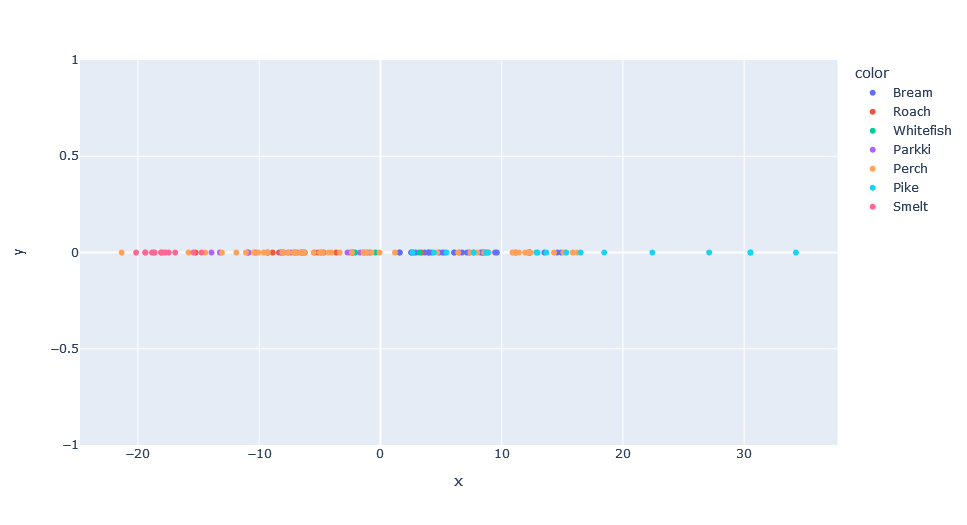

**1. Check covariance Matrix:**

In [ ]:
X = df[['Length2', 'Width', 'Height']].to_numpy()

In [ ]:
X.shape

(159, 3)

In [ ]:
covariance=np.cov(df[['Length2', 'Width', 'Height']],rowvar=False)
covariance

array([[114.83968792,  15.78116877,  29.41698763],
       [ 15.78116877,   2.84193469,   5.72912464],
       [ 29.41698763,   5.72912464,  18.37157576]])

**2. Calcualte Eigenvectors and Eigenvalues**

In [ ]:
eigvals, eigvecs = np.linalg.eig(covariance)
u = eigvecs[:, 0]
v = eigvecs[:, 1]
z = eigvecs[:, 2]
eigvals,u,v,z

(array([125.38998847,  10.26611186,   0.39709805]),
 array([0.95348302, 0.1353767 , 0.26933859]),
 array([ 0.28610153, -0.12496243, -0.95001595]),
 array([ 0.09495282, -0.98288226,  0.15788103]))

**3. Select M (< Ds) Eigenvectors with highest Eigenvalues**

In [ ]:
eigvecs_sorted = np.array([u,v])
eigvecs_sorted

array([[ 0.95348302,  0.1353767 ,  0.26933859],
       [ 0.28610153, -0.12496243, -0.95001595]])

In [ ]:
eigvecs_sorted.shape

(2, 3)

**4. Project data points to these Eigenvectors**

In [ ]:
X_centered = X - X.mean(axis=0)

4.1 Project data points based on two eigenvectors

In [ ]:
X_transformed = X_centered @ eigvecs_sorted.T

In [ ]:
X_transformed[:, :1]

array([[ -2.24270546],
       [ -1.08734211],
       [ -0.87130731],
       [  1.57468966],
       [  1.58951192],
       [  2.54098303],
       [  2.74394909],
       [  2.54375821],
       [  2.92411923],
       [  3.66691925],
       [  3.98231676],
       [  3.97236184],
       [  4.22375504],
       [  4.83730738],
       [  5.13109044],
       [  5.31673873],
       [  6.07476981],
       [  6.08377087],
       [  6.7390792 ],
       [  6.50724859],
       [  7.13892302],
       [  7.34497434],
       [  7.68265979],
       [  8.25996797],
       [  8.3945504 ],
       [  8.48957823],
       [  8.4950449 ],
       [  9.45804193],
       [  9.60535966],
       [ 11.1704467 ],
       [ 12.31268653],
       [ 12.32343649],
       [ 13.51939215],
       [ 14.91729435],
       [ 14.5937407 ],
       [-15.24002314],
       [-10.94574902],
       [-10.28777596],
       [ -9.28667127],
       [ -8.88043659],
       [ -8.36401737],
       [ -8.15482397],
       [ -7.99215644],
       [ -7

In [ ]:
X_transformed[:, -1:][0]

array([-3.23472893])

In [ ]:
x=X_transformed[:, :1]
y=X_transformed[:, -1:]
labels=df[['Species']]['Species']

In [ ]:
X_transformed.shape

(159, 2)

In [ ]:
df_tset = pd.DataFrame(X_transformed, columns=['x', 'y'])

In [ ]:
fig = px.scatter(x=df_tset['x'], y=df_tset['y'], color=labels)
fig.show()

4.2 Project data points based on one eigenvector

In [ ]:
eigvecs_sorted = np.array(u)
eigvecs_sorted

array([0.95348302, 0.1353767 , 0.26933859])

In [ ]:
X_transformed = X_centered @ eigvecs_sorted.T
X_transformed

array([ -2.24270546,  -1.08734211,  -0.87130731,   1.57468966,
         1.58951192,   2.54098303,   2.74394909,   2.54375821,
         2.92411923,   3.66691925,   3.98231676,   3.97236184,
         4.22375504,   4.83730738,   5.13109044,   5.31673873,
         6.07476981,   6.08377087,   6.7390792 ,   6.50724859,
         7.13892302,   7.34497434,   7.68265979,   8.25996797,
         8.3945504 ,   8.48957823,   8.4950449 ,   9.45804193,
         9.60535966,  11.1704467 ,  12.31268653,  12.32343649,
        13.51939215,  14.91729435,  14.5937407 , -15.24002314,
       -10.94574902, -10.28777596,  -9.28667127,  -8.88043659,
        -8.36401737,  -8.15482397,  -7.99215644,  -7.05990849,
        -6.86448789,  -6.24325547,  -6.44050582,  -6.41660267,
        -4.67607519,  -5.44252937,  -5.15034769,  -3.64292071,
        -2.3179838 ,  -1.41020026,   3.39686144,  -2.48541934,
        -2.07185056,  -0.41261079,   3.23192029,   8.65627019,
        12.24189368, -13.9327188 , -13.24439973, -10.87

In [ ]:
x=X_transformed
y=[0]*len(X_transformed)
labels=df[['Species']]['Species']

In [ ]:
fig = px.scatter(x=x, y=y, color=labels)
fig.show()

Pike

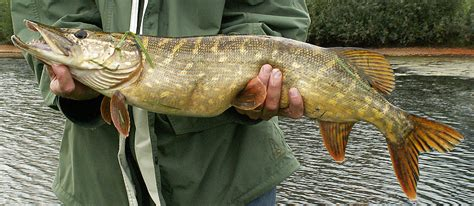

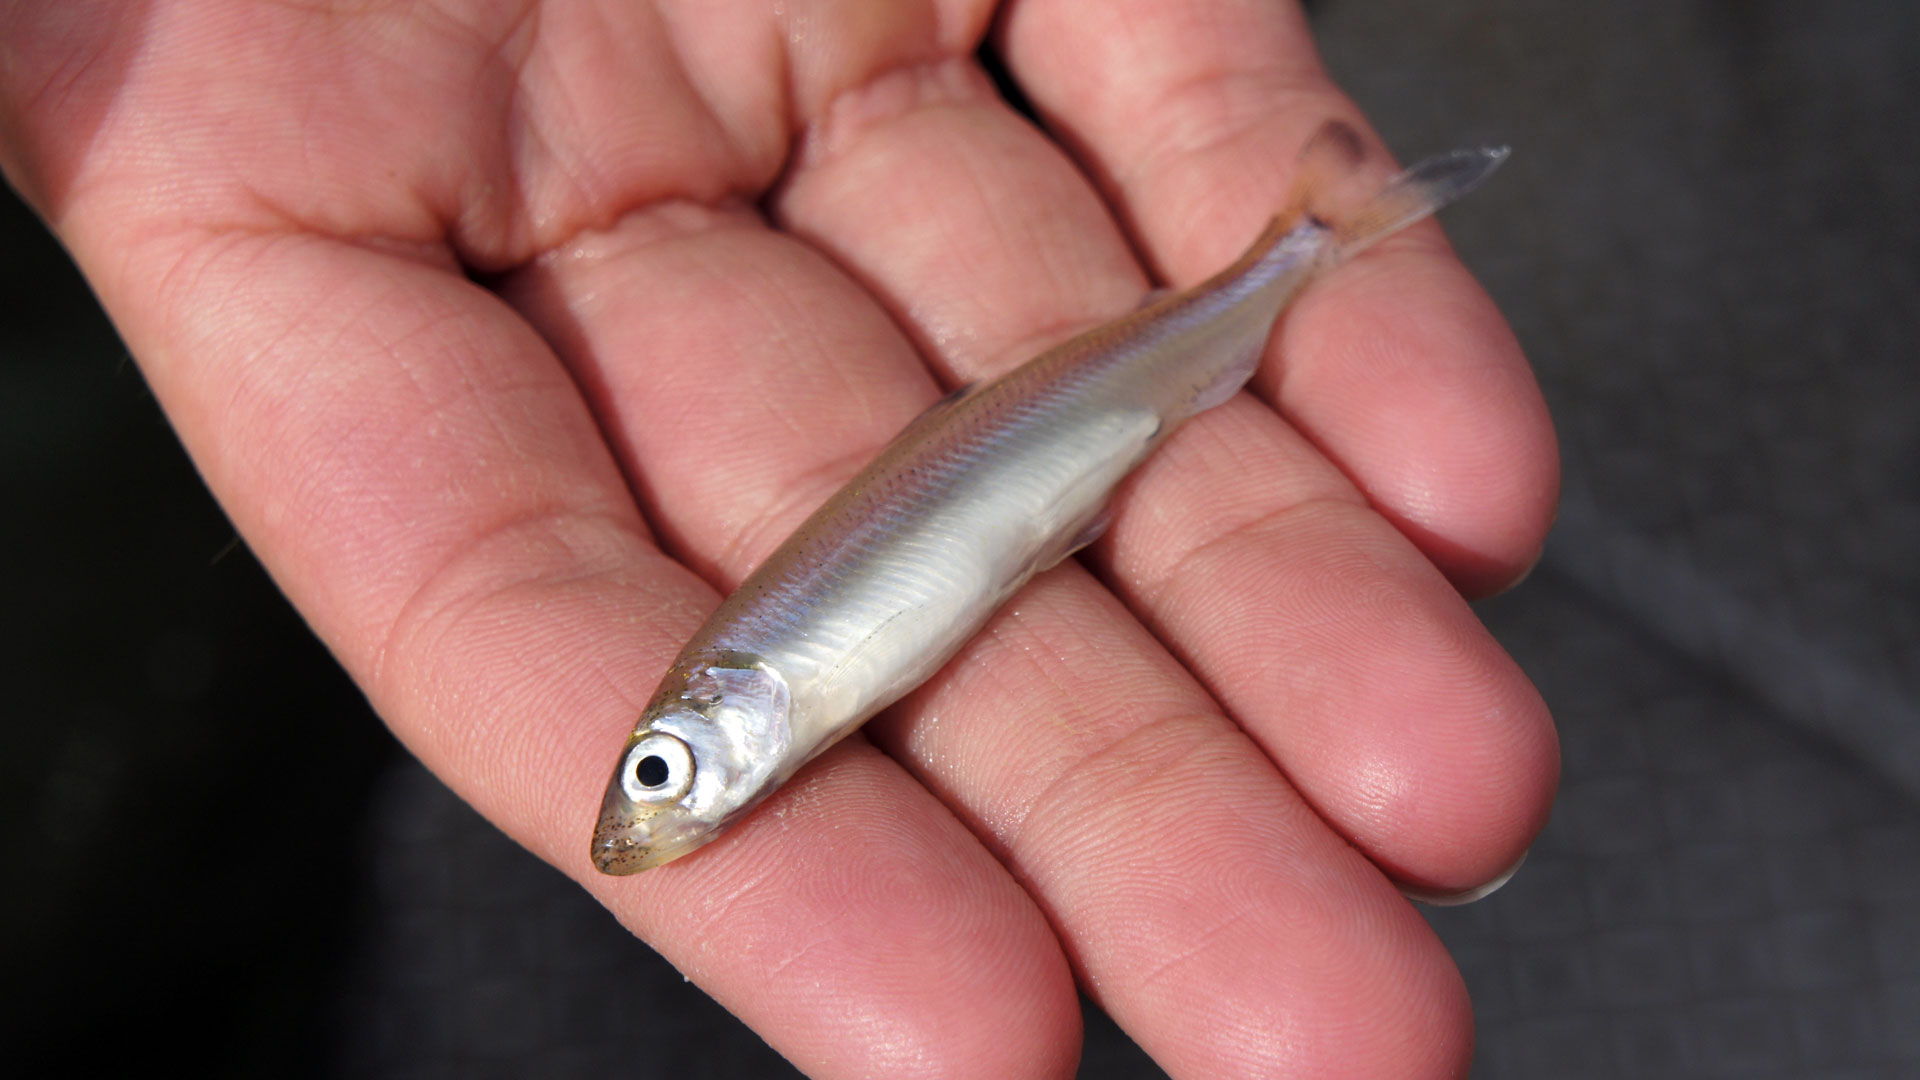